<center>
<h1> Zinda Hospital - Prediction using Logistic Regression
</center>

###### One of the leading hospitals would like to improve customer experience at Zinda Hospital and predict Positive, Negative or Passive score from customer surveys conducted by the hospital.

###### 1. Perform Binary Classification and display the results
###### 2. Perform Multinomial Classification and display the results

###### Author -  Anuj Chauhan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

mhexcel = pd.ExcelFile('Zinda Hospital.xlsx')

mhtraindf = mhexcel.parse(sheet_name='Training Data')
mhtestdf = mhexcel.parse(sheet_name='Test Data')
mhmergeddf = pd.concat([mhtraindf,mhtestdf])

print(mhmergeddf.shape)


(5353, 52)


## Converting this problem into a binary classification problem

In [51]:
mhmergeddf['NPS_Status_Combined'] = np.where((mhmergeddf['NPS_Status']=='Passive') | (mhmergeddf['NPS_Status']=='Detractor'),1,0)

mhmergeddf.NPS_Status_Combined.value_counts()

0    3343
1    2010
Name: NPS_Status_Combined, dtype: int64

## One Hot Encoding of dependent variables and Train-Test split

In [52]:
X_features = mhmergeddf[mhmergeddf.columns.difference(['SN','NPS_Status','NPS_Status_Combined','AdmissionDate','DischargeDate','CE_NPS'])]

encoded_X_features = pd.get_dummies(mhmergeddf[X_features.columns],drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X_features,mhmergeddf.NPS_Status_Combined,test_size=0.3,random_state=42)

## Random Forest Feature Selection

In [54]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

forest = RandomForestClassifier(n_estimators=250,random_state=1)

feat_labels = X_train.columns

forest.fit(X_train,y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(encoded_X_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1) HospitalNo2                    0.072347
 2) AgeYrs                         0.061961
 3) CE_CSAT                        0.051667
 4) Estimatedcost                  0.051126
 5) CE_VALUEFORMONEY               0.049178
 6) LengthofStay                   0.043586
 7) AE_ATTENDEEFOOD                0.028219
 8) CE_ACCESSIBILITY               0.027221
 9) DP_DISCHARGEPROCESS            0.023756
10) DP_DISCHARGETIME               0.022733
11) AD_TARRIFFPACKAGESEXPLAINATION 0.022555
12) FNB_FOODQUALITY                0.020205
13) FNB_FOODDELIVERYTIME           0.019451
14) FNB_DIETICIAN                  0.017923
15) AD_TIME                        0.017724
16) DP_DISCHARGEQUERIES            0.017156
17) INR_ROOMPEACE                  0.017116
18) INR_ROOMAMBIENCE               0.016516
19) BedCategory_GENERAL            0.015913
20) Sex_M                          0.015148
21) AE_PATIENTSTATUSINFO           0.014954
22) DOC_VISITS                     0.014304
23) INR_ROOMCLEANLINESS         

# Selecting features based on user specified threshold

In [55]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest,threshold=0.011991, prefit=True)

X_selected_features = sfm.transform(X_train)

print('Number of features that meet this threshold criterion: ',X_selected_features.shape[1])
X_selected_feature_columns = []
for f in range(X_selected_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
    X_selected_feature_columns.append(feat_labels[indices[f]])

X_selected_feature_columns  

Number of features that meet this threshold criterion:  30
 1) HospitalNo2                    0.072347
 2) AgeYrs                         0.061961
 3) CE_CSAT                        0.051667
 4) Estimatedcost                  0.051126
 5) CE_VALUEFORMONEY               0.049178
 6) LengthofStay                   0.043586
 7) AE_ATTENDEEFOOD                0.028219
 8) CE_ACCESSIBILITY               0.027221
 9) DP_DISCHARGEPROCESS            0.023756
10) DP_DISCHARGETIME               0.022733
11) AD_TARRIFFPACKAGESEXPLAINATION 0.022555
12) FNB_FOODQUALITY                0.020205
13) FNB_FOODDELIVERYTIME           0.019451
14) FNB_DIETICIAN                  0.017923
15) AD_TIME                        0.017724
16) DP_DISCHARGEQUERIES            0.017156
17) INR_ROOMPEACE                  0.017116
18) INR_ROOMAMBIENCE               0.016516
19) BedCategory_GENERAL            0.015913
20) Sex_M                          0.015148
21) AE_PATIENTSTATUSINFO           0.014954
22) DOC_VISITS   

['HospitalNo2',
 'AgeYrs',
 'CE_CSAT',
 'Estimatedcost',
 'CE_VALUEFORMONEY',
 'LengthofStay',
 'AE_ATTENDEEFOOD',
 'CE_ACCESSIBILITY',
 'DP_DISCHARGEPROCESS',
 'DP_DISCHARGETIME',
 'AD_TARRIFFPACKAGESEXPLAINATION',
 'FNB_FOODQUALITY',
 'FNB_FOODDELIVERYTIME',
 'FNB_DIETICIAN',
 'AD_TIME',
 'DP_DISCHARGEQUERIES',
 'INR_ROOMPEACE',
 'INR_ROOMAMBIENCE',
 'BedCategory_GENERAL',
 'Sex_M',
 'AE_PATIENTSTATUSINFO',
 'DOC_VISITS',
 'INR_ROOMCLEANLINESS',
 'INR_ROOMEQUIPMENT',
 'AD_STAFFATTITUDE',
 'BedCategory_SEMISPECIAL',
 'AE_ATTENDEECARE',
 'InsPayorcategory_PATIENT',
 'InsPayorcategory_INSURANCE',
 'Department_GEN']

selected_encoded_features = X_train[X_selected_feature_columns]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(selected_encoded_features)
#sc1 = StandardScaler()
#sc1.fit(encoded_mhtestdf)
X_selected_features_train_std = sc.transform(selected_encoded_features)
#X_features_test_std = sc1.transform(encoded_mhtestdf)

#from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression(C=100.0,random_state=1)
#lr_model = lr.fit(X_features_train_std,y_train)
#print(lr_model.summary2())
#print(lr_model.scor)

## Binary Logistic Regression 

In [56]:
import statsmodels.api as sm

X = X_train[X_selected_feature_columns]

#X_test = X_test[X_selected_feature_columns]

logit = sm.Logit(y_train,sm.add_constant(X))
logit_model = logit.fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.529087
         Iterations 6


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     NPS_Status_Combined   No. Observations:                 3747
Model:                           Logit   Df Residuals:                     3716
Method:                            MLE   Df Model:                           30
Date:                 Mon, 07 Oct 2019   Pseudo R-squ.:                  0.2051
Time:                         18:28:11   Log-Likelihood:                -1982.5
converged:                        True   LL-Null:                       -2494.1
Covariance Type:             nonrobust   LLR p-value:                6.368e-196
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.3609      0.426     19.638      0.000       7.526       9.195
HospitalNo2                    -1.662e-06   1.36e-06     -1.223      0.221   -4.32e-06       1e-06
AgeYrs                            -0.0041      0.002     -2.271      0.023      -0.008      -0.001
CE_CSAT                           -0.7221      0.096     -7.523      0.000      -0.910      -0.534
Estimatedcost                   3.496e-07    4.2e-07      0.833      0.405   -4.73e-07    1.17e-06
CE_VALUEFORMONEY                  -0.5662      0.083     -6.816      0.000      -0.729      -0.403
LengthofStay                      -0.0059      0.008     -0.770      0.441      -0.021       0.009
AE_ATTENDEEFOOD                   -0.1122      0.079     -1.425      0.154      -0.267       0.042
CE_ACCESSIBILITY                  -0.1943      0.085     -2.274      0.023      -0.362      -0.027
DP_DISCHARGEPROCESS                0.0954      0.127      0.749      0.454      -0.154       0.345
DP_DISCHARGETIME                  -0.1687      0.104     -1.629      0.103      -0.372       0.034
AD_TARRIFFPACKAGESEXPLAINATION    -0.3770      0.092     -4.098      0.000      -0.557      -0.197
FNB_FOODQUALITY                   -0.0953      0.075     -1.266      0.206      -0.243       0.052
FNB_FOODDELIVERYTIME              -0.1165      0.086     -1.359      0.174      -0.284       0.051
FNB_DIETICIAN                     -0.0214      0.092     -0.233      0.816      -0.202       0.159
AD_TIME                            0.0019      0.082      0.023      0.982      -0.158       0.162
DP_DISCHARGEQUERIES               -0.2048      0.108     -1.903      0.057      -0.416       0.006
INR_ROOMPEACE                     -0.1020      0.084     -1.209      0.227      -0.268       0.063
INR_ROOMAMBIENCE                  -0.1836      0.111     -1.652      0.099      -0.401       0.034
BedCategory_GENERAL               -0.4401      0.110     -4.000      0.000      -0.656      -0.224
Sex_M                             -0.0608      0.079     -0.766      0.443      -0.216       0.095
AE_PATIENTSTATUSINFO              -0.2604      0.112     -2.320      0.020      -0.480      -0.040
DOC_VISITS                        -0.1930      0.086     -2.235      0.025      -0.362      -0.024
INR_ROOMCLEANLINESS                0.1581      0.093      1.703      0.089      -0.024       0.340
INR_ROOMEQUIPMENT                  0.1667      0.100      1.671      0.095      -0.029       0.362
AD_STAFFATTITUDE                   0.2875      0.098      2.938      0.003       0.096       0.479
BedCategory_SEMISPECIAL            0.0798      0.092      0.864      0.387      -0.101       0.261
AE_ATTENDEECARE                    0.0236      0.106      0.224      0.823      -0.183       0.231
InsPayorcategory_PATIENT           0.1349      0.112      1.203      0.229      -0.085       0.355
InsPayorcategory_INSURANCE         0.1268      0.116      1.091 

In [57]:
def get_significant_vars(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])


In [58]:
significant_vars = get_significant_vars(logit_model)
#print(significant_vars)
significant_vars.remove('const')
final_logit = sm.Logit(y_train,sm.add_constant(X[significant_vars]))
final_logit_model = final_logit.fit()
final_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.536109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     NPS_Status_Combined   No. Observations:                 3747
Model:                           Logit   Df Residuals:                     3737
Method:                            MLE   Df Model:                            9
Date:                 Mon, 07 Oct 2019   Pseudo R-squ.:                  0.1946
Time:                         18:29:27   Log-Likelihood:                -2008.8
converged:                        True   LL-Null:                       -2494.1
Covariance Type:             nonrobust   LLR p-value:                3.728e-203
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.4355      0.386     21.877      0.000       7.680       9.191
AgeYrs                            -0.0043      0.002     -2.529      0.011      -0.008      -0.001
CE_CSAT                           -0.7858      0.094     -8.342      0.000      -0.970      -0.601
CE_VALUEFORMONEY                  -0.6530      0.081     -8.101      0.000      -0.811      -0.495
CE_ACCESSIBILITY                  -0.1775      0.084     -2.123      0.034      -0.341      -0.014
AD_TARRIFFPACKAGESEXPLAINATION    -0.4867      0.083     -5.836      0.000      -0.650      -0.323
BedCategory_GENERAL               -0.5790      0.090     -6.409      0.000      -0.756      -0.402
AE_PATIENTSTATUSINFO              -0.4143      0.087     -4.785      0.000      -0.584      -0.245
DOC_VISITS                        -0.2429      0.084     -2.887      0.004      -0.408      -0.078
AD_STAFFATTITUDE                   0.2369      0.090      2.640      0.008       0.061       0.413
==================================================================================================
"""

In [59]:
auc_score = metrics.roc_auc_score(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)
print('AUC score : ', round(float(auc_score),2))
#auc_score

AUC score :  0.78


## Creating Confusion Matrix

In [60]:
from sklearn import metrics

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm,annot = True, fmt='.2f',xticklabels=['Detractors','Promoters'],yticklabels= ['Detractors','Promoters'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

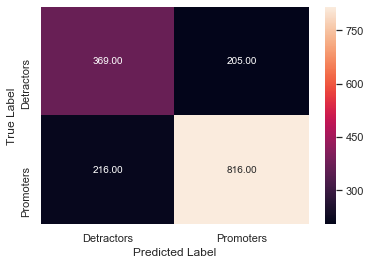

In [61]:
draw_cm(Y_pred_test_df.actual,Y_pred_test_df.predicted)

## Creating ROC Curve

In [62]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize = (8,6))
    plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.xlim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.show()
    return fpr, tpr, thresholds

    

In [63]:
significant_vars = get_significant_vars(final_logit_model)
significant_vars.remove('const')
Y_pred_test_df = pd.DataFrame({"actual": y_test,"predicted_prob": final_logit_model.predict(sm.add_constant(X_test[significant_vars]))})

Y_pred_test_df['predicted'] = Y_pred_test_df.predicted_prob.map(lambda x:1 if x>0.5 else 0)

from sklearn import metrics

print(metrics.classification_report(Y_pred_test_df.actual,Y_pred_test_df.predicted))

auc_score = metrics.roc_auc_score(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)
print('AUC score : ', round(float(auc_score),2))

sorted_Y_pred_test_df = Y_pred_test_df[['predicted_prob','actual']].sort_values('predicted_prob',ascending=False)

num_per_decile = int(len(sorted_Y_pred_test_df)/10)
print("obs per decile ",num_per_decile)

def get_deciles(df):
    df['decile'] = 1
    
    idx = 0
    
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
    
    df['decile'] = df['decile'] + 1
    return df

deciles_predict_df = get_deciles(sorted_Y_pred_test_df)

#deciles_predict_df[0:60]

#Y_pred_test_df.sample(10,random_state=42)


gain_lift_df = pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']

gain_lift_df['gain_percentage'] = (100*gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

gain_lift_df['lift'] = (gain_lift_df.gain_percentage/(gain_lift_df.decile*10))

gain_lift_df

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1032
           1       0.66      0.57      0.61       574

    accuracy                           0.74      1606
   macro avg       0.72      0.70      0.71      1606
weighted avg       0.74      0.74      0.74      1606

AUC score :  0.78
obs per decile  160


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,decile,gain,gain_percentage,lift
0,1,149,25.958188,2.595819
1,2,92,41.986063,2.099303
2,3,77,55.400697,1.846690
3,4,67,67.073171,1.676829
4,5,42,74.390244,1.487805
5,6,42,81.707317,1.361789
6,7,38,88.327526,1.261822
7,8,25,92.682927,1.158537
8,9,21,96.341463,1.070461
9,10,21,100.000000,1.000000


          tpr       fpr  thresholds      diff
526  0.646341  0.211240    0.444644  0.435101
510  0.634146  0.199612    0.458009  0.434534
524  0.644599  0.210271    0.444964  0.434328
518  0.639373  0.205426    0.448457  0.433946
511  0.634146  0.200581    0.457079  0.433565


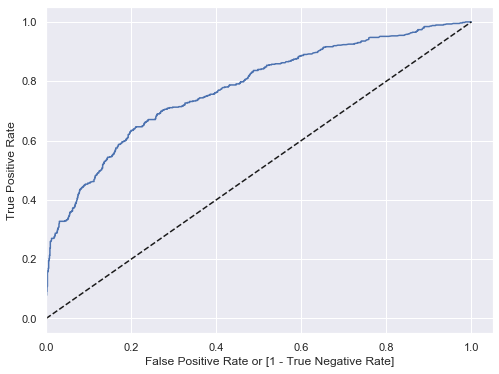

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1032
           1       0.63      0.64      0.64       574

    accuracy                           0.74      1606
   macro avg       0.71      0.72      0.72      1606
weighted avg       0.74      0.74      0.74      1606

AUC score :  0.78


In [64]:
fpr,tpr,thresholds = metrics.roc_curve(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob,drop_intermediate = False)

tpr_fpr = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds})
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

print(tpr_fpr.sort_values('diff',ascending=False)[0:5])

draw_roc(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)

prob_cutoff = 0.445

Y_pred_test_df['predicted'] = Y_pred_test_df.predicted_prob.map(lambda x:1 if x> prob_cutoff else 0)

from sklearn import metrics

print(metrics.classification_report(Y_pred_test_df.actual,Y_pred_test_df.predicted))

auc_score = metrics.roc_auc_score(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)
print('AUC score : ', round(float(auc_score),2))



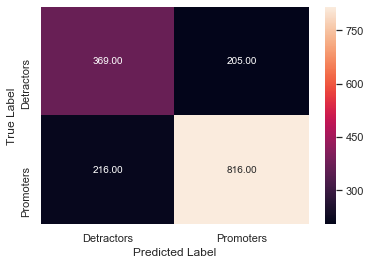

In [65]:
draw_cm(Y_pred_test_df.actual,Y_pred_test_df.predicted)

## Multinomial Classification

In [66]:
mhmergeddf['NPS_Status'] = mhmergeddf['NPS_Status'].map({'Promotor':0,'Passive':1,'Detractor':2})

In [67]:
mhmergeddf['NPS_Status'].value_counts()

0    3343
1    1464
2     546
Name: NPS_Status, dtype: int64

In [68]:
X_features = mhmergeddf[mhmergeddf.columns.difference(['SN','NPS_Status','NPS_Status_Combined','AdmissionDate','DischargeDate','CE_NPS'])]

encoded_X_features = pd.get_dummies(mhmergeddf[X_features.columns],drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X_features,mhmergeddf['NPS_Status'],test_size=0.3,random_state=42)


## Feature selection

In [69]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

forest = RandomForestClassifier(n_estimators=250,random_state=1)

feat_labels = X_train.columns

forest.fit(X_train,y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(encoded_X_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1) HospitalNo2                    0.070510
 2) AgeYrs                         0.061932
 3) Estimatedcost                  0.052710
 4) CE_VALUEFORMONEY               0.050036
 5) CE_CSAT                        0.047106
 6) LengthofStay                   0.043747
 7) CE_ACCESSIBILITY               0.029103
 8) AE_ATTENDEEFOOD                0.024194
 9) DP_DISCHARGETIME               0.020493
10) AD_TARRIFFPACKAGESEXPLAINATION 0.020460
11) DP_DISCHARGEPROCESS            0.020150
12) FNB_FOODQUALITY                0.019497
13) AD_TIME                        0.018733
14) FNB_FOODDELIVERYTIME           0.017545
15) DP_DISCHARGEQUERIES            0.017298
16) INR_ROOMPEACE                  0.016621
17) FNB_DIETICIAN                  0.016379
18) INR_ROOMCLEANLINESS            0.016163
19) INR_ROOMAMBIENCE               0.015813
20) Sex_M                          0.015635
21) AE_PATIENTSTATUSINFO           0.014979
22) DOC_VISITS                     0.014517
23) BedCategory_GENERAL         

## Selecting users based on user specified threshold

In [70]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest,threshold=0.012638, prefit=True)

X_selected_features = sfm.transform(X_train)

print('Number of features that meet this threshold criterion: ',X_selected_features.shape[1])
X_selected_feature_columns = []
for f in range(X_selected_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
    X_selected_feature_columns.append(feat_labels[indices[f]])

X_selected_feature_columns 

Number of features that meet this threshold criterion:  30
 1) HospitalNo2                    0.070510
 2) AgeYrs                         0.061932
 3) Estimatedcost                  0.052710
 4) CE_VALUEFORMONEY               0.050036
 5) CE_CSAT                        0.047106
 6) LengthofStay                   0.043747
 7) CE_ACCESSIBILITY               0.029103
 8) AE_ATTENDEEFOOD                0.024194
 9) DP_DISCHARGETIME               0.020493
10) AD_TARRIFFPACKAGESEXPLAINATION 0.020460
11) DP_DISCHARGEPROCESS            0.020150
12) FNB_FOODQUALITY                0.019497
13) AD_TIME                        0.018733
14) FNB_FOODDELIVERYTIME           0.017545
15) DP_DISCHARGEQUERIES            0.017298
16) INR_ROOMPEACE                  0.016621
17) FNB_DIETICIAN                  0.016379
18) INR_ROOMCLEANLINESS            0.016163
19) INR_ROOMAMBIENCE               0.015813
20) Sex_M                          0.015635
21) AE_PATIENTSTATUSINFO           0.014979
22) DOC_VISITS   

['HospitalNo2',
 'AgeYrs',
 'Estimatedcost',
 'CE_VALUEFORMONEY',
 'CE_CSAT',
 'LengthofStay',
 'CE_ACCESSIBILITY',
 'AE_ATTENDEEFOOD',
 'DP_DISCHARGETIME',
 'AD_TARRIFFPACKAGESEXPLAINATION',
 'DP_DISCHARGEPROCESS',
 'FNB_FOODQUALITY',
 'AD_TIME',
 'FNB_FOODDELIVERYTIME',
 'DP_DISCHARGEQUERIES',
 'INR_ROOMPEACE',
 'FNB_DIETICIAN',
 'INR_ROOMCLEANLINESS',
 'INR_ROOMAMBIENCE',
 'Sex_M',
 'AE_PATIENTSTATUSINFO',
 'DOC_VISITS',
 'BedCategory_GENERAL',
 'INR_ROOMEQUIPMENT',
 'AD_STAFFATTITUDE',
 'Department_GEN',
 'AE_ATTENDEECARE',
 'BedCategory_SEMISPECIAL',
 'InsPayorcategory_PATIENT',
 'FNB_STAFFATTITUDE']

In [71]:
from sklearn.linear_model import LogisticRegression

lr_multinomial = LogisticRegression(multi_class='multinomial',solver='newton-cg')

lr = LogisticRegression()

lr_model = lr.fit(X_train[X_selected_feature_columns],y_train)
lr_multinomial_model = lr_multinomial.fit(X_train[X_selected_feature_columns],y_train)


print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, lr_model.predict(X_train[X_selected_feature_columns])))
print("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr_model.predict(X_test[X_selected_feature_columns])))


print("Multinomial Logistic regression Train Accuracy using multinomial :: ", metrics.accuracy_score(y_train, lr_multinomial_model.predict(X_train[X_selected_feature_columns])))
print("Multinomial Logistic regression Test Accuracy multinomial :: ", metrics.accuracy_score(y_test, lr_multinomial_model.predict(X_test[X_selected_feature_columns])))
 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Multinomial Logistic regression Train Accuracy ::  0.6167600747264478
Multinomial Logistic regression Test Accuracy ::  0.6425902864259029
Multinomial Logistic regression Train Accuracy using multinomial ::  0.6728049105951428
Multinomial Logistic regression Test Accuracy multinomial ::  0.686799501867995


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.6728049105951428


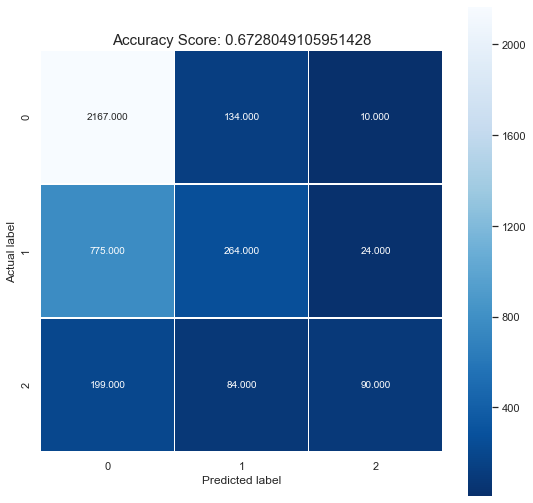

In [79]:
cm = metrics.confusion_matrix(y_train, lr_multinomial_model.predict(X_train[X_selected_feature_columns]))

score = lr_multinomial_model.score(X_train[X_selected_feature_columns], y_train)
print(score)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(score)
plt.title(plot_title, size = 15);

0.686799501867995


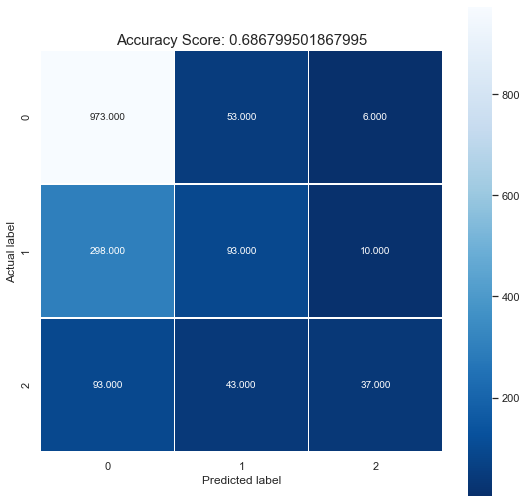

In [77]:
cm = metrics.confusion_matrix(y_test, lr_multinomial_model.predict(X_test[X_selected_feature_columns]))

score = lr_multinomial_model.score(X_test[X_selected_feature_columns], y_test)
print(score)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(score)
plt.title(plot_title, size = 15);